<a href="https://colab.research.google.com/github/jenzelcat/nmf_movie_recommender_public/blob/main/FinalProjectItm760.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importing libraries, dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# mounting drive in google drive

Mounted at /content/drive


In [ ]:
data_names = ['user_id', 'item_id','rating', 'timestamp']
# declaring cols for data

In [ ]:
item_names = ['movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown',
              'Action','Adventure','Animation','Childrens','Comedy', 'Crime','Documentary', 'Drama', 'Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War', 'Western']
#declaring cols for items

In [ ]:
uData = pd.read_csv('/content/drive/MyDrive/GroupProjectITM760/Converted/udata.csv', encoding='latin-1', names = data_names)
uItem = pd.read_csv('/content/drive/MyDrive/GroupProjectITM760/Converted/uitem.csv', encoding='latin-1', names = item_names)
uGenre = pd.read_csv('/content/drive/MyDrive/GroupProjectITM760/Converted/ugenre.csv', encoding='latin-1')

# convert data, item, genre csv to dataframe, with appended cols

In [ ]:
uData.head(5)
#TESTING

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
uItem.head(5)
#TESTING

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,1-Jan-95,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,2,GoldenEye,1995,1-Jan-95,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
2,3,Four Rooms,1995,1-Jan-95,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
3,4,Get Shorty,1995,1-Jan-95,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,5,Copycat,1995,1-Jan-95,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [ ]:
uData.drop(['timestamp'], axis=1)
# keeping useful information, assuming timestamp not needed

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
uPivotData = uData.pivot(index='user_id', columns=['item_id'], values='rating').fillna(0)
# pivoting data to be x = userid, y = movie

**SVD TEST STARTS HERE**

In [ ]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

# preparing SVD algorithm with scipy

In [ ]:
R = uPivotData.to_numpy()
# converting pandas dataframe to numpy array

rating_mean = np.mean(R, axis = 1)
R_demeaned = R - rating_mean.reshape(-1, 1)
# normalizing all users rating means

In [ ]:
U, sigma, Vt = svds(R_demeaned, k = 50)
sigma = np.diag(sigma)
# implementing SVD so that sigma returned is just value instead of matrix

In [ ]:
predRatings = np.dot(np.dot(U, sigma), Vt) + rating_mean.reshape(-1, 1)
# multiply matrix back and adding user means back to get prediction

In [ ]:
uPred = pd.DataFrame(data=predRatings, index=uPivotData.index, columns = uPivotData.columns)
# create new pandas prediction dataframe for all user ratings

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# import required libraries

sqrt(mean_squared_error(uPivotData, uPred))
# calculate rmse for accuracy (despite outliers)

# received 0.579, will test other methods to see accuracy

0.5796462668260163

In [ ]:
uPivotData.head()
# TESTING

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
uPred.head()
#TESTING

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,6.488436,2.959503,1.634987,3.024467,1.656526,1.659506,3.630469,0.240669,1.791518,3.347816,...,0.011976,-0.092017,-0.074553,-0.060985,0.009427,-0.035641,-0.039227,-0.037434,-0.025552,0.023513
2,2.347262,0.129689,-0.098917,0.328828,0.159517,0.481361,0.213002,0.097908,1.892100,0.671000,...,0.003943,-0.026939,-0.035460,-0.029883,-0.027153,-0.015244,-0.008277,-0.011760,0.011639,-0.046924
3,0.291905,-0.263830,-0.151454,-0.179289,0.013462,-0.088309,-0.057624,0.568764,-0.018506,0.280742,...,-0.028964,-0.031622,0.045513,0.026089,-0.021705,0.002282,0.032363,0.017322,-0.006644,-0.009480
4,0.366410,-0.443535,0.041151,-0.007616,0.055373,-0.080352,0.299015,-0.010882,-0.160888,-0.118834,...,0.020069,0.015981,-0.000182,0.005593,0.026634,0.023562,0.036405,0.029984,0.015612,-0.008713
5,4.263488,1.937122,0.052529,1.049350,0.652765,0.002836,1.730461,0.870584,0.341027,0.569055,...,0.019973,-0.053521,-0.017242,-0.007137,-0.038987,0.010338,0.004869,0.007603,-0.020575,0.003330


**KNN TEST STARTS HERE**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# importing knn and training from scikit

In [ ]:
X = uData[['user_id','item_id','timestamp']]
y = uData['rating']
#determining X & y, y = target

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)
#creating training sets

In [ ]:
Train_y= train_y.values.reshape(-1, 1)
# reshaping values

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)
# creating model with 3 neighbours, fitting algorithm

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# importing libraries

train_preds = knn_model.predict(train_X)
mse = mean_squared_error(train_y, train_preds)
rmse = sqrt(mse)
rmse
# calculating rmse, testing accuracy

# rmse received was 1.06! almost twice as innacurate as svd!

1.0613081550614787

**NMF TEST STARTS HERE**

In [ ]:
from sklearn.decomposition import NMF
# preparing NMF algorithm from scikit

In [ ]:
n_components = 10
nmf_model = NMF(n_components=n_components, init='random', random_state=0)
#creating the nmf model

In [ ]:
W = nmf_model.fit_transform(uPivotData)
H = nmf_model.components_


# as NMF is an unsupervised learning method, there is no way to easily determine accuracy
# we are assuming then, that NMF is the most accurate!
# (research shows NMF has more accurate MAE, which is better when there are outliers)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
selected_users = [196, 200, 102, 294, 299]
#saying which users we want to find reccomendations for

In [ ]:
user_indices = [uPivotData.index.get_loc(user) for user in selected_users]
#getting indicies for matrix

In [ ]:
user_recommendations = np.dot(W, H)
#rebuilding the non negative matrix to fit the width and height

In [ ]:
for i, user_index in enumerate(user_indices):
    top_movie_indices = np.argsort(user_recommendations[:, user_index])[::-1][:10]
    top_movie_titles = uItem.loc[uItem['movie_id'].isin(top_movie_indices + 1), 'movie_title'].tolist()
    # find top 10 movies and titles for current user in loop

    print("Top 10 Recommended Movies for User", {user_index+1})
    for a, title in zip(range(1, 11), top_movie_titles):
        print(f"{a}. {title}" )
    # displaying top 10 for each user

Top 10 Recommended Movies for User {196}
1. Willy Wonka and the Chocolate Factory 
2. Starship Troopers 
3. Wings of the Dove, The 
4. 187
5. Miracle on 34th Street 
6. Old Yeller 
7. Star Trek V: The Final Frontier 
8. Free Willy 3: The Rescue 
9. Substance of Fire, The 
10. My Fellow Americans 
Top 10 Recommended Movies for User {200}
1. True Romance 
2. Home Alone 
3. Evil Dead II 
4. Leaving Las Vegas 
5. Ulee's Gold 
6. FairyTale: A True Story 
7. Mad City 
8. Lord of Illusions 
9. True Crime 
10. Bulletproof 
Top 10 Recommended Movies for User {102}
1. 3 Ninjas: High Noon At Mega Mountain 
2. Mrs. Doubtfire 
3. Mission: Impossible 
4. Old Yeller 
5. Star Trek V: The Final Frontier 
6. Dragonheart 
7. Beauty and the Beast 
8. Grifters, The 
9. Tin Men 
10. Bad Company 
Top 10 Recommended Movies for User {294}
1. Kansas City 
2. Leaving Las Vegas 
3. Liar Liar 
4. Kiss the Girls 
5. Mrs. Doubtfire 
6. Old Yeller 
7. Star Trek V: The Final Frontier 
8. Notorious 
9. NeverEnding Stor

### **Cosign Similarity**


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
#importing libraries

In [ ]:
uPivotItem = uItem.drop(['release_date','video_release_date','IMDb_URL','unknown'], axis=1)
#changing the item table for values I want

In [ ]:
uPivotItem.head()
#checking to see its ok

,movie_id,movie_title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,2,GoldenEye,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0
2,3,Four Rooms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0
3,4,Get Shorty,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0
4,5,Copycat,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0


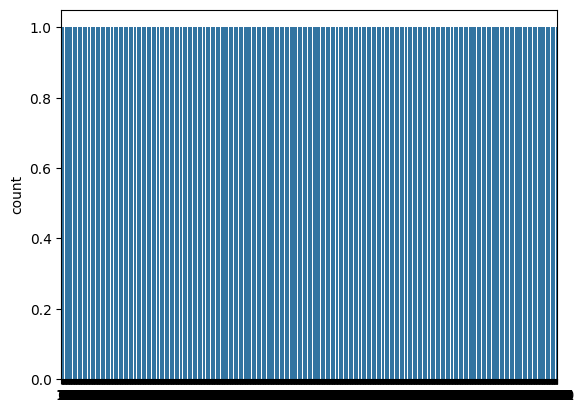

In [ ]:
import seaborn as sns
sns.countplot(uPivotItem['movie_id'],label="Count")
plt.show()

In [ ]:
print(uPivotItem.shape)
print(uPivotItem['movie_title'].unique())
print(uPivotItem.groupby('movie_title').size())
#running explatory analysis on our data

(1682, 20)
['Toy Story ' 'GoldenEye ' 'Four Rooms ' ... 'B. Monkey ' 'You So Crazy '
 'Scream of Stone (Schrei aus Stein) ']
movie_title
'Til There Was You                 1
1-900                              1
101 Dalmatians                     1
12 Angry Men                       1
187                                1
                                  ..
Young Guns                         1
Young Guns II                      1
Young Poisoner's Handbook, The     1
Zeus and Roxanne                   1
unknown                            1
Length: 1659, dtype: int64


In [ ]:
uPivotItem.drop('movie_id', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('movies')
plt.show()
#plotting explatory analysis on graph

ValueError: Layout of 2x2 must be larger than required size 18

<Figure size 900x900 with 0 Axes>

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Action','Adventure','Animation','Childrens','Comedy', 'Crime','Documentary', 'Drama', 'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War', 'Western']
X_plot = uPivotItem[feature_names]
y_plot = uPivotItem['movie_id']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_plot, c = y_plot, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

#running a coorelation analysis

In [ ]:
moviesimilarity = cosine_similarity(moviematrix)
#using the cosine function to measure the distance between movie and find which are most similar to eachother

In [ ]:
moviematrix.head()
#testing